In [1]:
# Notebook library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/rating_update.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings

In [3]:
beer_ratings = get_data()

In [4]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
len(beer_ratings.brewery_name.unique())

5743

In [6]:
len(beer_ratings.review_profilename.unique())

33388

In [7]:
len(beer_ratings.beer_style.unique())

103

In [8]:
beer_ratings.loc[:,['review_overall','review_aroma','review_appearance',
                    'review_palate','review_taste','beer_abv']].describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06
mean,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00
std,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01


In [9]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [10]:
reviews = beer_ratings.loc[:,['review_profilename', 'beer_name', 'brewery_name', 'beer_style']]

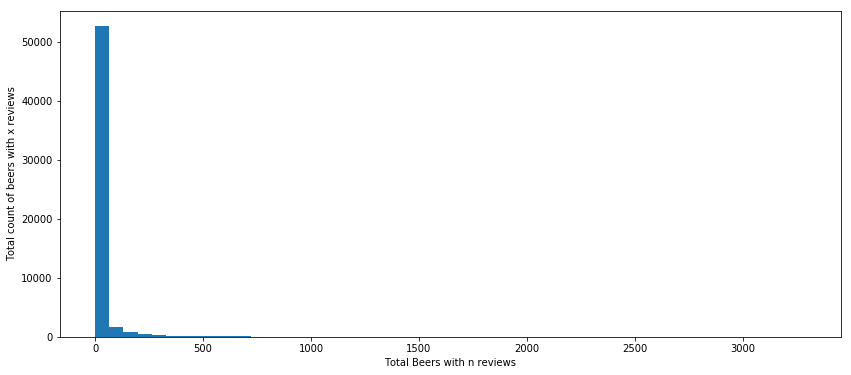

,review_profilename
count,56857.000000
mean,27.899221
std,122.167414
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,3289.000000


In [11]:
# beer_review_counts is a series with an index by beer name, 
# and a count of how many reviews that the beer has under 'review_profilename'

beer_review_counts = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['beer_name'], axis=0).count()

# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(beer_review_counts['review_profilename'].values,  bins=50)
plt.xlabel('Total Beers with n reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

beer_review_counts.describe()

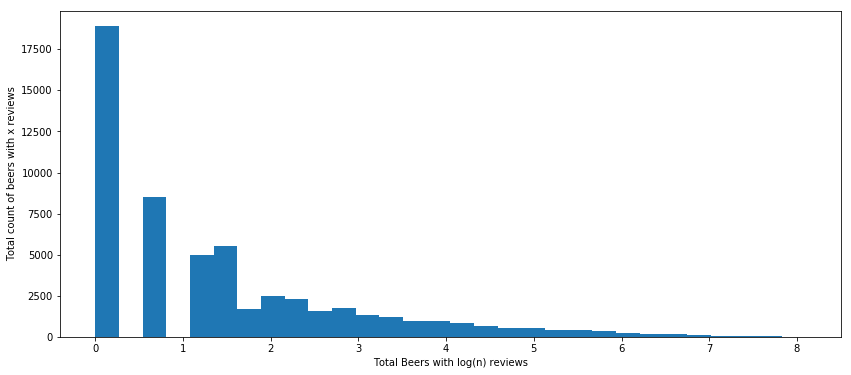

In [12]:
# Histogram of log(beer_review_counts)
plt.figure(figsize=[14,6])
plt.hist(np.log(beer_review_counts[beer_review_counts['review_profilename'] >= 1].values),  bins=30)
plt.xlabel('Total Beers with log(n) reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

# There is a beer with a total review count of 0, 

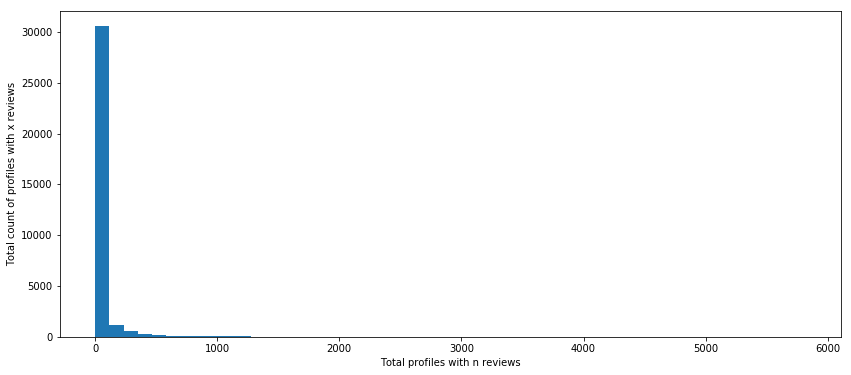

,beer_name
count,33387.000000
mean,47.511487
std,182.599759
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,5817.000000


In [13]:
# review_profile_total is a series with an index by 'review_profilename', 
# and a count of how many reviews that profile has under 'beer_name'
review_profile_total = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['review_profilename'], axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(review_profile_total['beer_name'].values,  bins=50)
plt.xlabel('Total profiles with n reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

review_profile_total.describe()

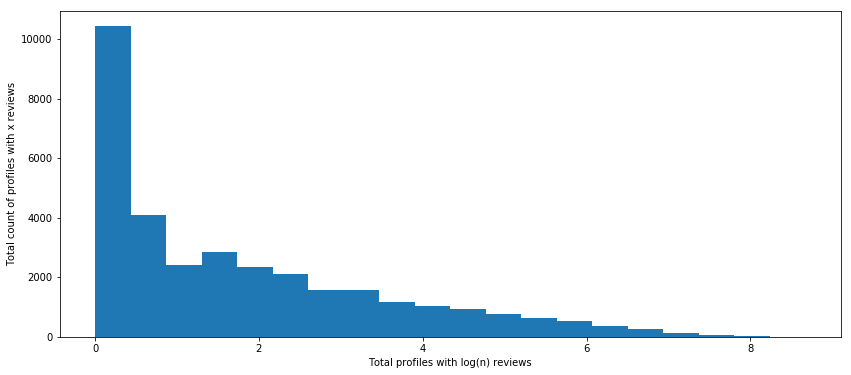

In [14]:
# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(np.log(review_profile_total['beer_name'].values),  bins=20)
plt.xlabel('Total profiles with log(n) reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

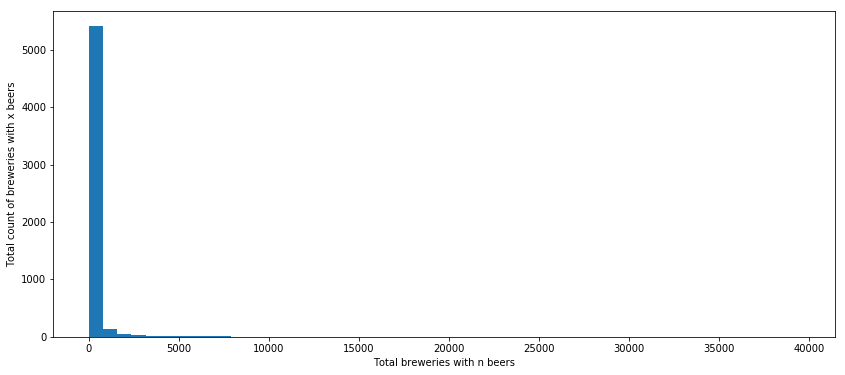

,beer_name
count,5742.000000
mean,276.314699
std,1500.440673
min,1.000000
25%,3.000000
50%,14.000000
75%,73.000000
max,39444.000000


In [15]:
# beers_per_brewery is a series with an index by 'brewery_name', 
# and a count of how many beers that brewery has under 'beer_name'
beers_per_brewery = reviews.loc[:,['brewery_name', 'beer_name']].groupby('brewery_name', axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(beers_per_brewery['beer_name'].values,  bins=50)
plt.xlabel('Total breweries with n beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

beers_per_brewery.describe()

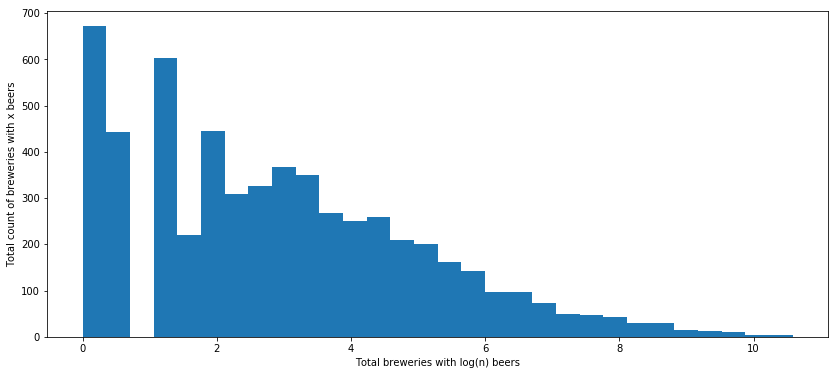

In [16]:
plt.figure(figsize=[14,6])
plt.hist(np.log(beers_per_brewery['beer_name'].values),  bins=30)
plt.xlabel('Total breweries with log(n) beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

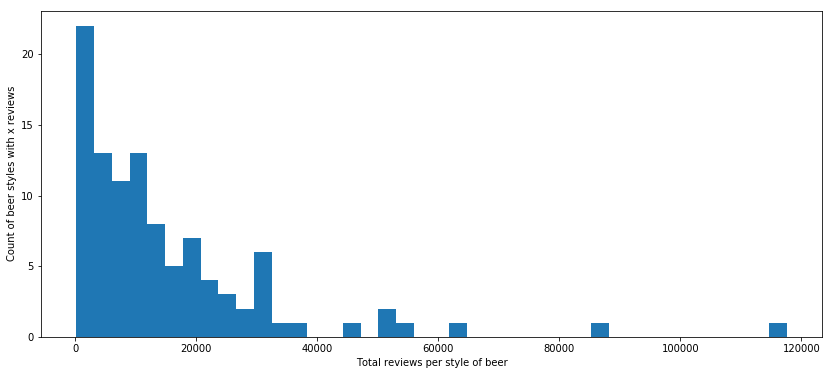

,beer_name
count,103.000000
mean,15404.019417
std,17918.355962
min,241.000000
25%,4000.000000
50%,10130.000000
75%,19757.500000
max,117586.000000


In [17]:
# beers_style_counts is a series with an index by 'beer_style', 
# and a count of how many beers of that style under 'beer_name'

beer_style_counts = reviews.loc[:,['beer_style', 'beer_name']].groupby('beer_style').count()

# Histogram of
plt.figure(figsize=[14,6])
plt.hist(beer_style_counts['beer_name'].values, bins=40)
plt.xlabel('Total reviews per style of beer')
plt.ylabel('Count of beer styles with x reviews')
plt.show()

beer_style_counts.describe()

### Brewery and beer name and style review comparisons

In [18]:
comparisons = beer_ratings.loc[:,['beer_name', 'brewery_name', 'beer_style', 
                                  'review_overall', 'review_taste', 'review_appearance', 'review_palate', 'review_aroma']]

### Beer style comparisons aggregated by mean

In [19]:
comparison_style = comparisons.loc[:,['beer_style', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('beer_style').mean()

In [20]:
beer_style_counts = beer_style_counts.rename({'beer_name':'count'}, axis=1)
comparison_style = comparison_style.merge(beer_style_counts, left_index=True, right_index=True)

In [21]:
comparison_style[comparison_style.review_overall == comparison_style.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
beer_style,,,,,,
American Wild Ale,4.093262,4.149938,4.005451,4.040632,4.126756,17794


In [22]:
comparison_style[comparison_style.review_overall == comparison_style.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
beer_style,,,,,,
Low Alcohol Beer,2.578268,2.462948,2.917569,2.519151,2.463364,1201


In [23]:
comparison_style.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,count
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,3.734437,3.696503,3.756411,3.656336,3.630974,15404.019417
std,0.302386,0.378028,0.310587,0.335940,0.397539,17918.355962
min,2.578268,2.272133,2.429390,2.339774,2.170009,241.000000
25%,3.686703,3.577962,3.663537,3.549569,3.457926,4000.000000
50%,3.824054,3.748931,3.828293,3.717610,3.707178,10130.000000
75%,3.901827,3.945255,3.962933,3.885090,3.897247,19757.500000
max,4.093262,4.211603,4.210072,4.124986,4.160665,117586.000000


### Brewery comparisons aggregated by mean

In [24]:
comparisons.keys()

Index(['beer_name', 'brewery_name', 'beer_style', 'review_overall',
       'review_taste', 'review_appearance', 'review_palate', 'review_aroma'],
      dtype='object')

In [25]:
comparison_brewery = comparisons.loc[:,['brewery_name', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('brewery_name').mean()

In [26]:
beers_per_brewery = beers_per_brewery.rename({'beer_name':'brewery_rating_counts'}, axis=1)

In [27]:
comparison_brewery = comparison_brewery.merge(beers_per_brewery, left_index=True, right_index=True)

In [28]:
comparison_brewery.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
count,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000
mean,3.528502,3.450650,3.580222,3.431623,3.406767,276.314699
std,0.539197,0.544598,0.446349,0.508000,0.510655,1500.440673
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.250000,3.166667,3.366022,3.166667,3.152845,3.000000
50%,3.625000,3.534577,3.666667,3.500000,3.500000,14.000000
75%,3.888664,3.815789,3.875000,3.766272,3.750000,73.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,39444.000000


In [29]:
comparison_brewery[comparison_brewery.review_overall == comparison_brewery.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
brewery_name,,,,,,
Bad Wörishofer Lowenbrau / Privatbrauerei Hotel Braugasthof,5.0,4.50,4.00,4.00,4.00,1
Binghams Brewery,5.0,5.00,4.50,4.50,5.00,1
Brasserie Oxymore,5.0,4.50,4.50,4.00,4.50,1
Brauerei Gasthof Pfister GmbH,5.0,4.50,5.00,4.50,3.00,1
Brauerei Gundel,5.0,4.50,5.00,5.00,4.50,1
Edsten Brewing Company,5.0,4.75,5.00,5.00,4.75,2
Elizabeth Street Brewery,5.0,5.00,4.50,4.50,4.50,1
Facer's Flintshire Brewery,5.0,4.00,4.00,4.00,4.00,1
Hakone Beer,5.0,5.00,4.00,3.50,4.00,1


In [30]:
comparison_brewery[comparison_brewery.review_overall == comparison_brewery.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,brewery_rating_counts
brewery_name,,,,,,
Bières De Carcassonne,1.0,1.000,1.000,1.00,1.00,1
Cervejaria Bruge,1.0,1.000,3.500,2.50,1.50,1
Dednovo Brewery,1.0,1.000,2.000,1.00,1.00,1
Hakodate Beer,1.0,2.000,3.000,3.00,2.00,1
Hayashibune Yakurai Beer,1.0,1.000,3.000,2.00,2.00,1
Jyohana Beer,1.0,1.500,3.000,1.00,1.00,1
Landskron Brauerei,1.0,2.000,3.500,1.50,1.50,1
Miyamori Brauhaus,1.0,1.000,1.000,1.00,1.00,1
Murphy's Wagon Wheel,1.0,1.000,3.000,1.50,2.00,2


### Beer comparisons (by name) aggregated by mean

In [31]:
comparison_beer = comparisons.loc[:,['beer_name', 'review_overall', 'review_taste', 'review_appearance', 
                                    'review_palate', 'review_aroma']].groupby('beer_name').mean()

In [32]:
beer_review_counts = beer_review_counts.rename({'review_profilename':'total_reviews'}, axis=1)
comparison_beer = comparison_beer.merge(beer_review_counts, left_index=True, right_index=True)

In [33]:
comparison_beer.describe()

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
count,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000
mean,3.654631,3.599762,3.684827,3.574166,3.554467,27.899221
std,0.617673,0.627565,0.506162,0.577430,0.590001,122.167414
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.416667,3.318681,3.500000,3.272727,3.250000,1.000000
50%,3.750000,3.700000,3.753968,3.666667,3.594340,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,3289.000000


In [34]:
comparison_beer[comparison_beer.review_overall == comparison_beer.review_overall.max()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
beer_name,,,,,,
"""Best Of Both Worlds"" Stout",5.0,5.00,4.5,3.5,4.5,1
'99 Wee Heavy Scotch Ale,5.0,4.75,5.0,5.0,4.5,2
10th Anniversary Bock-style Red Fox,5.0,5.00,4.0,5.0,4.5,1
10th Anniversary Strong Belgian,5.0,5.00,3.0,5.0,5.0,1
2005 Grand Cru,5.0,5.00,4.5,4.5,4.5,1
2006 Barley Wine (Triple IPA),5.0,4.50,4.5,4.5,4.0,1
3 Threads,5.0,5.00,3.5,4.5,4.0,1
3X IPA,5.0,4.50,4.0,5.0,4.0,1
508 Montezuma Imperial Stout,5.0,5.00,5.0,5.0,4.5,1


In [35]:
comparison_beer[comparison_beer.review_overall == comparison_beer.review_overall.min()]

,review_overall,review_taste,review_appearance,review_palate,review_aroma,total_reviews
beer_name,,,,,,
'Nilla Stout,1.0,1.0,4.000000,1.00,3.0,1
A Bisto De Nas,1.0,1.0,1.000000,1.00,1.0,1
Akashi Kaigan Beer,1.0,1.0,2.000000,1.75,2.0,2
Ambar Green,1.0,2.0,2.000000,1.50,1.5,1
Animée Clear Beer,1.0,2.0,1.500000,1.50,1.0,1
Antarctica Chopp Claro,1.0,1.5,2.000000,1.00,1.0,1
Apa,1.0,1.5,2.000000,1.50,1.5,1
Archipelago Trader's Brown Ale,1.0,1.0,2.000000,2.00,1.5,1
Arctic Experience,1.0,1.5,3.000000,1.50,1.0,1


### Reviewer ratings aggregated by mean

In [36]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [37]:
comparison_profile = beer_ratings.loc[:,['review_overall',
       'review_aroma', 'review_appearance', 'review_profilename',
       'review_palate', 'review_taste']]

In [38]:
comparison_profile = comparison_profile.groupby('review_profilename').mean()

In [39]:
review_profile_total = review_profile_total.rename({'beer_name':'total_profile_reviews'}, axis=1)

In [40]:
comparison_profile = comparison_profile.merge(review_profile_total, left_index=True, right_index=True)

In [41]:
comparison_profile.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
count,33387.000000,33387.000000,33387.000000,33387.000000,33387.000000,33387.000000
mean,3.942319,3.797850,3.921710,3.800976,3.917633,47.511487
std,0.661727,0.647632,0.542062,0.625813,0.698469,182.599759
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.687500,3.500000,3.685888,3.500000,3.641751,1.000000
50%,4.000000,3.863506,4.000000,3.868284,4.000000,3.000000
75%,4.333333,4.133867,4.208333,4.083333,4.333333,16.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5817.000000


In [42]:
comparison_profile[comparison_profile.review_overall == comparison_profile.review_overall.max()]

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
review_profilename,,,,,,
01Ryan10,5.0,5.00,4.5,5.00,5.00,1
103stiga,5.0,5.00,5.0,4.00,5.00,1
1100.0,5.0,4.00,4.0,4.50,5.00,1
13smurrf,5.0,5.00,5.0,5.00,5.00,1
17202826.0,5.0,5.00,5.0,5.00,5.00,1
187.0,5.0,5.00,5.0,5.00,5.00,1
196osh,5.0,4.50,4.5,4.00,5.00,1
1Mainebrew,5.0,4.50,4.5,4.50,4.50,1
1badcableguy,5.0,3.50,4.0,4.00,4.00,1


In [43]:
comparison_profile[comparison_profile.review_overall == comparison_profile.review_overall.min()]

,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_profile_reviews
review_profilename,,,,,,
706Union,1.0,1.000000,3.500000,2.500000,1.5,1
7out,1.0,1.000000,3.000000,1.500000,1.0,1
AnIslandOfGeese,1.0,1.000000,3.000000,3.000000,1.0,1
AnimaDigita,1.0,1.500000,1.500000,2.000000,1.0,1
Armorus,1.0,3.000000,3.000000,2.500000,1.5,1
Astrodamus,1.0,2.000000,3.000000,3.000000,1.0,1
BEERandCIGS,1.0,1.000000,1.500000,1.000000,1.0,1
BMBeerhead,1.0,1.000000,1.000000,1.000000,1.0,1
BeerAdvocator,1.0,1.000000,1.000000,1.000000,1.0,2


## Saving the comparison details as csv

In [44]:
comparison_style.to_csv('/home/grimoire/Projects/BeerRatings/comparison_style.csv')
comparison_beer.to_csv('/home/grimoire/Projects/BeerRatings/comparison_beer.csv')
comparison_brewery.to_csv('/home/grimoire/Projects/BeerRatings/comparison_brewery.csv')
comparison_profile.to_csv('/home/grimoire/Projects/BeerRatings/comparison_profile.csv')

## Master merge